In [3]:
import tensorflow as tf 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


8


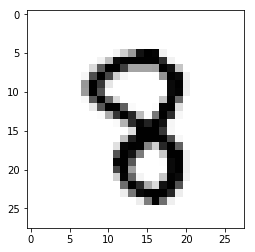

In [4]:
import matplotlib.pyplot as plt
image_index = 50555 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


In [5]:
x_train.shape


(60000, 28, 28)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.2088 - accuracy: 0.9367
Epoch 2/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0830 - accuracy: 0.97470s - loss: 0.0830 - accuracy: 0.
Epoch 3/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0571 - accuracy: 0.98170s - loss: 0.0572 - ac
Epoch 4/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0436 - accuracy: 0.9857
Epoch 5/10
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0332 - accuracy: 0.9894
Epoch 6/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0306 - accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0250 - accuracy: 0.9919
Epoch 8/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0211 - accuracy: 0.9929
Epoch 9/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0193 - accuracy:

In [16]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 11s 1ms/step


[0.06232951707619227, 0.9847000241279602]

Comparisions between activation functions:
---------------------------------------------------------------
Sigmoid - 0.04310258559571812, 0.9861999750137329
Relu    - 0.06232951707619227, 0.9847000241279602


fashion_mnist

Relu    - 0.296536854416132, 0.9118000268936157
sigmoid - 0.2550588166356087, 0.9125999808311462



